1)  First, analyzing the plotting it seems that x and y do not have a linear relationship (Figure 1) . To approach this problem two methods were attempted, adding a cubic term or a polynomial term grade 4.


For the cubic approach we got the results shown in Figure 2, with a Mean Squared Error (MSE) of 18318.61 for the training set and 7595.99 for the test set. For the polynomial approach in Figure 3, we got a MSE of 16065.41 for the training set and 7609.68 for the test set. Thus it was considered that the latter was a better approach for its reduction in the training set error.

Finally the equation got was:

y= -8.16-185.96x+7.55x²+87.23x³-7.82x⁴


In [1]:
import matplotlib.pyplot as plt
import numpy as np

#read the data
x_train = np.load('/content/x_train.npy')
y_train = np.load('/content/y_train.npy')
x_test = np.load('/content/x_test.npy')
y_test = np.load('/content/y_test.npy')

print(x_train.shape, y_train.shape)

(100,) (100,)


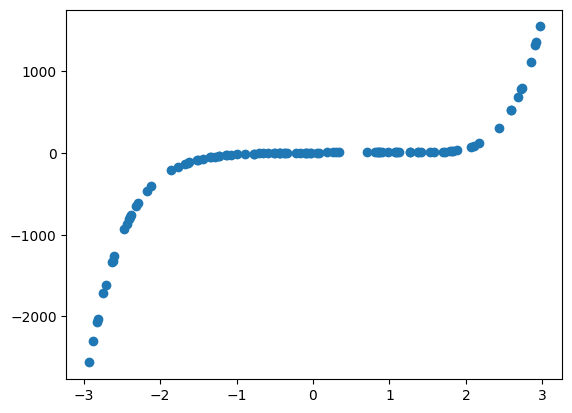

In [ ]:
#Figure 1
plt.scatter(x_train,y_train)
plt.show()

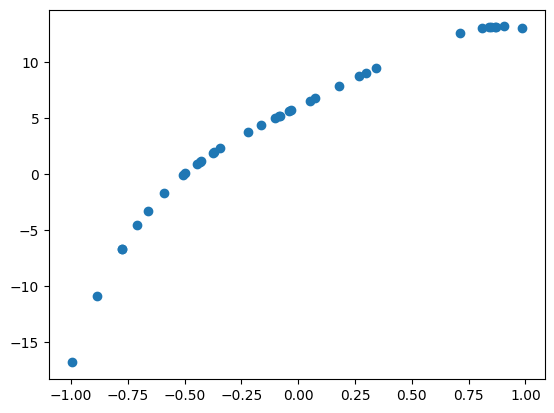

In [ ]:
x_train_to_plot = [x_train[i] for i in range(len(x_train)) if x_train[i]<=1 and x_train[i]>=-1]
y_train_to_plot = [y_train[i] for i in range(len(y_train)) if x_train[i]<=1 and x_train[i]>=-1]
plt.scatter(x_train_to_plot,y_train_to_plot)
plt.show()

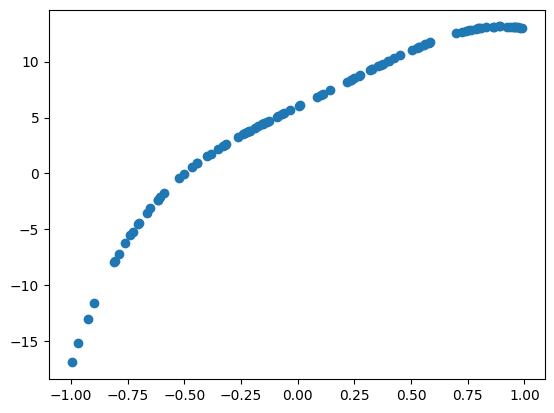

In [ ]:
plt.scatter(x_test,y_test)
plt.show()

In [35]:
# Using Gradient Descent
# Function: it is not linear so we can add a quadratic and cubic relationship y=c+x+x²+x³ ; h=Theta0 + Theta1*x + Theta2*x²+ Theta3*x³
X = np.column_stack([np.ones(len(x_train)),x_train,x_train ** 2, x_train ** 3])
theta = np.array([0,0,0,0])
alpha = 0.001
m = len(x_train)
for _ in range(10000):
  h = np.dot(X, theta.T)
  E = y_train-h
  theta = theta + (alpha/m)* np.dot(X.T, E)
  #Cost function mean_squared_error
  cost = np.mean(E ** 2)


print(cost,theta)


18318.61946175416 [  41.94457137 -180.98871245  -53.48823986   86.05195932]


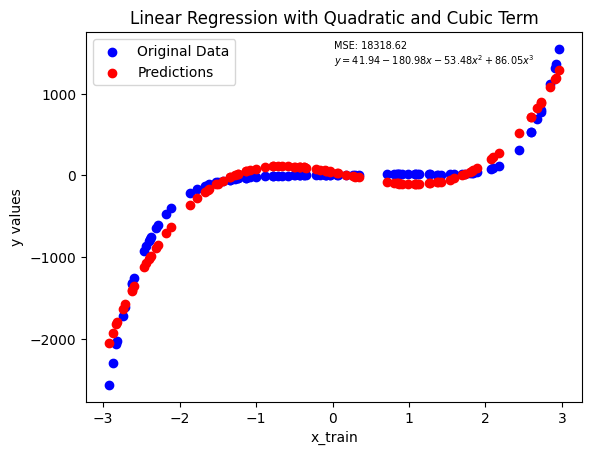

In [ ]:
#Figure 2a
y_predicted = np.dot(X,theta)
plt.scatter(x_train, y_train, label="Original Data", color='blue')
plt.scatter(x_train, y_predicted, label="Predictions", color='red')
plt.xlabel("x_train")
plt.ylabel("y values")
plt.title("Linear Regression with Quadratic and Cubic Term")
plt.text(0.5, 0.95, f'MSE: {cost:.2f}', transform=plt.gca().transAxes, fontsize=7, verticalalignment='bottom')
plt.text(0.5, 0.90, r'$y = 41.94 - 180.98x - 53.48x^2 + 86.05x^3$', transform=plt.gca().transAxes, fontsize=7, verticalalignment='bottom')
plt.legend()
plt.show()

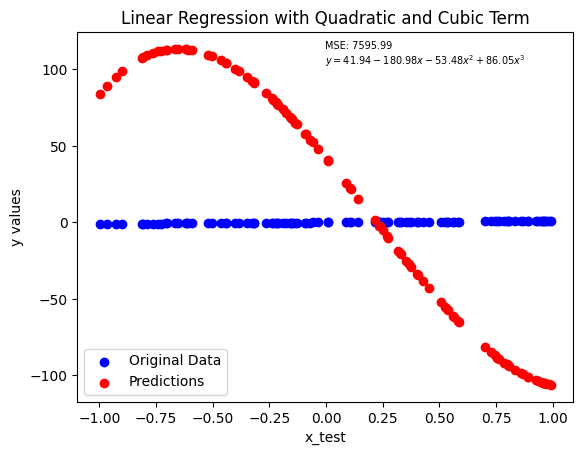

In [ ]:
#Figure 2b
X_test = np.column_stack([np.ones(len(x_test)),x_test, x_test ** 2, x_test ** 3])
y_test_predicted = np.dot(X_test,theta)
cost = np.mean(( y_test-y_test_predicted) ** 2)

plt.scatter(x_test, x_test, label="Original Data", color='blue')
plt.scatter(x_test, y_test_predicted, label="Predictions", color='red')
plt.text(0.5, 0.95, f'MSE: {cost:.2f}', transform=plt.gca().transAxes, fontsize=7, verticalalignment='bottom')
plt.text(0.5, 0.90, r'$y = 41.94 - 180.98x - 53.48x^2 + 86.05x^3$', transform=plt.gca().transAxes, fontsize=7, verticalalignment='bottom')
plt.xlabel("x_test")
plt.ylabel("y values")
plt.title("Linear Regression with Quadratic and Cubic Term")
plt.legend()
plt.show()

In [19]:
# Function: addig another polinomial term y=x+x²x³+x⁴ ; h=Theta0 + Theta1*x + Theta2*x²+ Theta3*x³+ Theta4*x4

X = np.column_stack([np.ones(len(x_train)),x_train,x_train ** 2,x_train ** 3,x_train ** 4])
theta = np.array([0,0,0,0,0])
alpha = 0.001
m = len(x_train)
for _ in range(10000):
  h = np.dot(X, theta.T)
  E = y_train-h
  theta = theta + (alpha/m)* np.dot(X.T, E)
  #Cost function mean_squared_error
  cost = np.mean(E ** 2)


print(cost,theta)


16065.412804421869 [  -8.16426416 -185.96982403    7.55034568   87.23292263   -7.82367147]


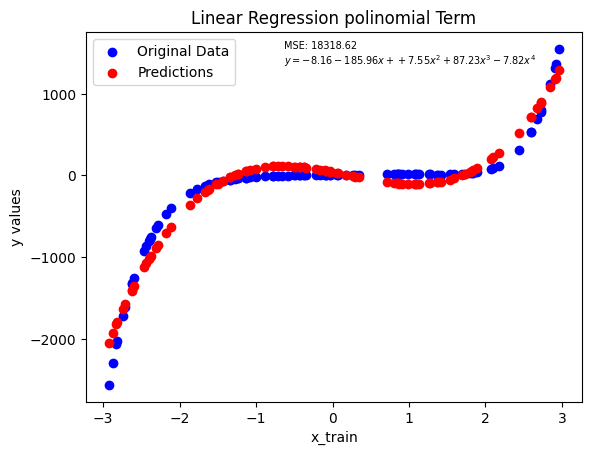

In [17]:
#Figure 3a
y_predicted = np.dot(X,theta)
plt.scatter(x_train, y_train, label="Original Data", color='blue')
plt.scatter(x_train, y_predicted, label="Predictions", color='red')
plt.text(0.4, 0.95, f'MSE: {cost:.2f}', transform=plt.gca().transAxes, fontsize=7, verticalalignment='bottom')
plt.text(0.4, 0.90, r'$y = - 8.16 - 185.96x + +7.55x^2 + 87.23x^3 - 7.82x^4$', transform=plt.gca().transAxes, fontsize=7, verticalalignment='bottom')
plt.xlabel("x_train")
plt.ylabel("y values")
plt.title("Linear Regression polinomial Term")
plt.legend()
plt.show()

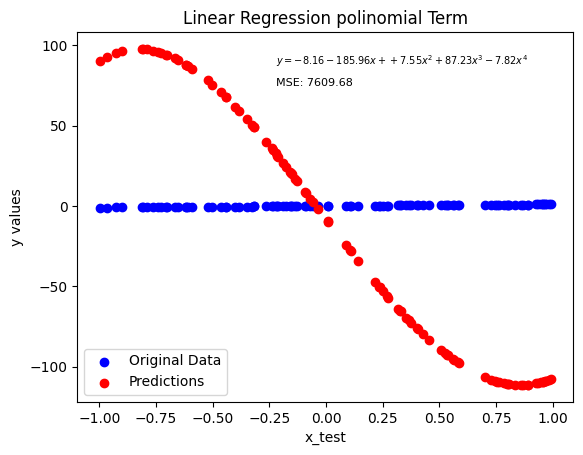

In [20]:
#Figure 3b
X_test = np.column_stack([np.ones(len(x_test)),x_test,x_test ** 2, x_test ** 3,x_test **4])
y_test_predicted = np.dot(X_test,theta)
cost = np.mean(( y_test-y_test_predicted) ** 2)

plt.scatter(x_test, x_test, label="Original Data", color='blue')
plt.scatter(x_test, y_test_predicted, label="Predictions", color='red')
plt.text(0.4, 0.85, f'MSE: {cost:.2f}', transform=plt.gca().transAxes, fontsize=8, verticalalignment='bottom')
plt.text(0.4, 0.90, r'$y = - 8.16 - 185.96x + +7.55x^2 + 87.23x^3 - 7.82x^4$', transform=plt.gca().transAxes, fontsize=7, verticalalignment='bottom')
plt.xlabel("x_test")
plt.ylabel("y values")
plt.title("Linear Regression polinomial Term")
plt.legend()
plt.show()

2) Using the formula y=β0​+β1​x1​+β2​x2​+⋯+βn​xn​ for Problem 2, the average least squares error was 5,042,692,452. Beta values show us how much each predictor collaborates, the one with the highest absolute value was # Garages with a value of 255,831.  

Using only the # Garages as the predictor the error was 75,554,268,118. As it is much higher than the whole model error, we cannot use only the # Garages as the predictor.

Similarly, to get the feature that has the least effect we seek for the smallest beta value, which is Bathrooms with a value of 384. Excluding this from the model results in an error of 6,113,489,043.

Finally, both strategies, using only one predictor and excluding the one with the least effect, resulted in an increase of the error of the model.

Only with this information it would be the best option using the whole model.


In [21]:
import pandas as pd

#read the data
data = pd.read_excel('/content/Housing_data_regression.xlsx')
x = data.iloc[:, :8]  # First 8 columns
y = data.iloc[:, -1]
print(data.shape, x.shape, y.shape)
print(data)


(20, 9) (20, 8) (20,)
    House ID  Bathrooms  Land Area  Living area  # Garages  # Rooms  \
0          1        1.0     3.4720        0.998        1.0        7   
1          2        1.0     3.5310        1.500        2.0        7   
2          3        1.0     2.2750        1.175        1.0        6   
3          4        1.0     4.0500        1.232        1.0        6   
4          5        1.0     4.4550        1.121        1.0        6   
5          6        1.0     4.4550        0.988        1.0        6   
6          7        1.0     5.8500        1.240        1.0        7   
7          8        1.0     9.5200        1.501        0.0        6   
8          9        2.5     9.8000        3.420        2.0       10   
9         10        2.5    12.8000        3.000        2.0        9   
10        11        1.0     6.4350        1.225        2.0        6   
11        12        1.0     4.9883        1.552        1.0        6   
12        13        1.0     5.5200        0.975        

In [37]:

X = np.column_stack([np.ones(len(x)),x])
theta = np.array(np.zeros(X.shape)[1])
alpha = 0.001
m = len(x)

for _ in range(100000):
  h = np.dot(X, theta.T)
  E = y-h
  theta = theta + (alpha/m)* np.dot(X.T, E)
  #Cost function mean_squared_error
  cost = np.mean(E ** 2)


print(cost,theta)

5042692452.074814 [-155265.06480707     384.26159295  198686.13681087    7286.74672763
  255831.79624271   49294.2494504    99838.36293847 -142961.14730996
   -2365.22335942]


In [38]:
#Getting the one that collaborates the most
max_beta_index = np.argmax(abs(theta))
x.iloc[:,max_beta_index].name

'# Garages'

In [39]:
#using only garages to predict the price
X = np.column_stack([np.ones(len(x)),x.iloc[:,max_beta_index]])
theta = np.array(np.zeros(X.shape)[1])
alpha = 0.001
m = len(x)

for _ in range(100000):
  h = np.dot(X, theta.T)
  E = y-h
  theta = theta + (alpha/m)* np.dot(X.T, E)
  #Cost function mean_squared_error
  cost = np.mean(E ** 2)


print(cost,theta)


75554268118.99432 [400549.12045518 233499.89728715]


In [40]:
#Getting the one that collaborates the least
min_beta_index = np.argmin(abs(theta))
x.iloc[:,min_beta_index].name

'Bathrooms'

In [41]:
#removing only bathrooms to predict the price
x_reduced = x.drop(x.columns[min_beta_index], axis=1)

X = np.column_stack([np.ones(len(x)),x_reduced])

theta = np.array(np.zeros(X.shape)[1])
alpha = 0.001
m = len(x)

for _ in range(100000):
  h = np.dot(X, theta.T)
  E = y-h
  theta = theta + (alpha/m)* np.dot(X.T, E)
  #Cost function mean_squared_error
  cost = np.mean(E ** 2)


print(cost,theta)

6113489043.442497 [-151846.58787116    1494.02079284    3717.16086344  360942.19549031
   50004.15230525  118489.02425378 -139268.27125809   -3460.45837586]
